# Artificial Neural Network Group 1

In [55]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
#import sklearn import *

In [3]:
tf.__version__

'2.8.0'

In [10]:
dataset = pd.read_excel('Data_for_All.xlsx')
X = dataset[['MQ9', 'MQ2', 'Temperature-G4', 'Pressure', 'Altitude', 'Humidity',
       'IR_Temp', 'Meter', 'Soil-G1']] # independent variables
y = dataset[['MQ135-G3']] # dependent variable CO2

In [11]:
dataset.columns

Index(['MQ9', 'MQ2', 'Temperature-G4', 'Pressure', 'Altitude', 'Humidity',
       'IR_Temp', 'Meter', 'Soil-G1', 'MQ135-G3'],
      dtype='object')

In [12]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

## Regression Results
The P>|t| column represents the p-value associated with the value in the t value column. The t is the value of the t-statistic for testing if the corresponding coefficient is different from 0. If the p-value is less than a certain significance level (e.g. α = .05) then the predictor variable is said to have a statistically significant relationship with the response variable in the model.

It can be seen that our independent values are good predictors based on P>|t|, besides the Altitude which has a high score of P>|t|. Additionlay note that R-squared value is 0.911.

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so accept alternet hypothesis.

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               MQ135-G3   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     354.5
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          2.16e-158
Time:                        11:10:56   Log-Likelihood:                -1341.7
No. Observations:                 323   AIC:                             2703.
Df Residuals:                     313   BIC:                             2741.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            241.9096     46.010      5.

In [14]:
print(X)

     const    MQ9    MQ2  Temperature-G4  Pressure  Altitude  Humidity  \
0      1.0  241.0  200.0             7.7     99270    171.76        55   
1      1.0  241.0  199.0             7.7     99270    171.58        55   
2      1.0  242.0  196.0             7.7     99277    171.84        56   
3      1.0  241.0  194.0             7.7     99278    171.58        56   
4      1.0  236.0  192.0             7.7     99275    171.67        56   
..     ...    ...    ...             ...       ...       ...       ...   
318    1.0  139.0  145.0             6.1     98288    256.23        54   
319    1.0  141.0  145.0             6.2     98300    254.53        54   
320    1.0  140.0  145.0             6.3     98331    252.65        54   
321    1.0  140.0  146.0             6.4     98327    252.39        54   
322    1.0  140.0  145.0             6.4     98329    252.82        54   

      IR_Temp  Meter  Soil-G1  
0       -1.50      8       78  
1       -1.50      8       78  
2    99280.50  

In [15]:
print(y)

     MQ135-G3
0       698.0
1       698.0
2       697.0
3       692.0
4       689.0
..        ...
318     526.0
319     525.0
320     524.0
321     523.0
322     524.0

[323 rows x 1 columns]


### Standardizing the data set

In [16]:
from sklearn.preprocessing import StandardScaler #scaling the data
sc_X = StandardScaler()
sc_y=StandardScaler()
X= sc_X.fit_transform(X)
y= sc_y.fit_transform(y)

In [17]:
print(X) #Scaled value

[[ 0.          2.40874106  4.43476459 ... -0.05572844  0.54481119
  -1.70135995]
 [ 0.          2.40874106  4.33667598 ... -0.05572844  0.54481119
  -1.70135995]
 [ 0.          2.4382833   4.04241017 ... 17.94435574  0.54481119
  -1.5544636 ]
 ...
 [ 0.         -0.57502477 -0.96010875 ... -0.05546555  0.54481119
   0.50208537]
 [ 0.         -0.57502477 -0.86202014 ... -0.05546555  0.54481119
   0.50208537]
 [ 0.         -0.57502477 -0.96010875 ... -0.05546555  0.54481119
   0.50208537]]


In [18]:
print(y) # Scaled value

[[ 2.74642662]
 [ 2.74642662]
 [ 2.72702935]
 [ 2.63004297]
 [ 2.57185114]
 [ 2.47486477]
 [ 2.47486477]
 [ 2.39727567]
 [ 2.35848112]
 [ 2.31968657]
 [ 2.06752199]
 [ 2.12571382]
 [ 2.12571382]
 [ 2.10631654]
 [ 1.95113834]
 [ 2.04812471]
 [ 2.00933016]
 [ 2.04812471]
 [ 2.00933016]
 [ 2.00933016]
 [ 1.97053561]
 [ 1.93174106]
 [ 1.83475469]
 [ 1.77656286]
 [ 1.69897376]
 [ 1.73776831]
 [ 1.73776831]
 [ 1.69897376]
 [ 1.67957649]
 [ 1.62138466]
 [ 1.58259011]
 [ 1.56319284]
 [ 1.56319284]
 [ 1.19464461]
 [ 1.19464461]
 [ 1.38861736]
 [ 1.52439828]
 [ 1.42741191]
 [ 1.40801463]
 [ 1.38861736]
 [ 1.33042553]
 [ 1.11705551]
 [ 1.11705551]
 [ 1.31102826]
 [ 1.29163098]
 [ 1.17524733]
 [ 1.02006913]
 [ 1.17524733]
 [ 1.03946641]
 [ 1.17524733]
 [ 1.19464461]
 [ 1.13645278]
 [ 1.09765823]
 [ 1.05886368]
 [ 0.84549365]
 [ 1.03946641]
 [ 1.03946641]
 [ 1.02006913]
 [ 0.9618773 ]
 [ 0.94248003]
 [ 0.90368548]
 [ 0.90368548]
 [ 0.8842882 ]
 [ 0.82609638]
 [ 0.86489093]
 [ 0.72911   ]
 [ 0.78730

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
ann = tf.keras.models.Sequential()

In [21]:
ann.add(tf.keras.layers.Dense(units=30, activation='relu')) #layer one with 30 nodes

In [22]:
ann.add(tf.keras.layers.Dense(units=30, activation='relu')) #layer two with 30 nodes

In [23]:
ann.add(tf.keras.layers.Dense(units=30, activation='relu')) #layer three with 30 nodes

In [24]:
ann.add(tf.keras.layers.Dense(units=1)) #final output layer

### Optimizing using the Adam Algorithm and the Mean Squared Error Function
The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

The loss function in a neural network quantifies the difference between the expected outcome and the outcome produced by the machine learning model. From the loss function, we can derive the gradients which are used to update the weights. The average over all losses constitutes the cost.

In [25]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Our ANN Model Diagram
As you can see modeal is created with 3 hidden with 30 nodes per layer. There are 9 input nodes and one predictor output for the MQ135 value.

<img src="img/ann_model.png">

### Training the ANN model on the Training set
#### The batch size defines the number of samples that will be propagated through the network.
 the Loss value implies how poorly or well a model behaves after each iteration of optimization. It can be seen that the. 
 The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
 The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
 As you can see the loss function is decreasing

- epoch size keep from `60`, batch size: `16`

In [26]:
history=ann.fit(X_train, y_train, batch_size = 16, epochs = 60)

Epoch 1/60
17/17 [==============================] - 0s 994us/step - loss: 1.0180
Epoch 2/60
17/17 [==============================] - 0s 1ms/step - loss: 0.6290
Epoch 3/60
17/17 [==============================] - 0s 882us/step - loss: 0.4757
Epoch 4/60
17/17 [==============================] - 0s 1ms/step - loss: 0.3244
Epoch 5/60
17/17 [==============================] - 0s 1ms/step - loss: 0.1802
Epoch 6/60
17/17 [==============================] - 0s 1ms/step - loss: 0.0879
Epoch 7/60
17/17 [==============================] - 0s 914us/step - loss: 0.0430
Epoch 8/60
17/17 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 9/60
17/17 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 10/60
17/17 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 11/60
17/17 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 12/60
17/17 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 13/60
17/17 [========================

Text(0.5, 1.0, 'Training Loss')

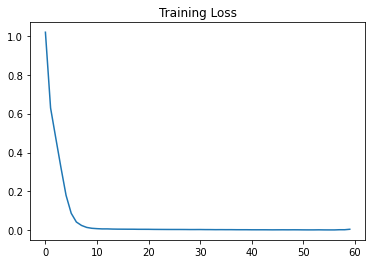

In [28]:
import matplotlib.pyplot as plt
loss=history.history['loss']
epochs_range=range(60)
plt.plot(epochs_range,loss,label='Training Loss')
plt.title('Training Loss')

#### Loss function decreases which is a good sign

In [29]:
y_pred = ann.predict(X_test)

In [30]:
from sklearn.metrics import r2_score

print("r-square",r2_score(y_test, y_pred))

r-square 0.9955504059303262


#### Prediction the Validation Dataset:
With the given section of the dataset two cases are made to predict the MQ135 value.

<img src="img/prediction_validati_dataset.png">

In [32]:
#case 1
print(sc_y.inverse_transform(ann.predict(sc_X.transform([[1,135.42,148.17,4.3,99824, 126.15, 65, -3.7, 9, 94 ]])))) # 'Pressure','Altitude','Humidity','IR_Temp'


[[498.32043]]


In [33]:
#case 2
print(sc_y.inverse_transform(ann.predict(sc_X.transform([[1,135.42,148.17,4.3,99818, 127.07, 65, -3.7, 9, 94 ]])))) # 'Pressure','Altitude','Humidity','IR_Temp'


[[498.30423]]


In [34]:
ann.save("model_60")

INFO:tensorflow:Assets written to: model_60/assets
